# 3 - Error, error bars, and timeseries

First, let's import the libraries and data we'll need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')

## 1. Error
Measures of error help us understand how accurate our predictions are. 

<div style = 'background-color:salmon'> <br> <center>  <b> <u> <font size="5">  CALCULATING A LINEAR FIT FROM A SCATTER </font> </u> </b>    </div>
<div style = 'background-color:salmon'> <br> </div>

### Relative error, absolute error, mean absolute error (MAE)
The simplest measure of error is to look at how far from the data our predictions are. Let's start by fitting a correlation in the NBA 2021 datset with a linear regression. We can consider the correlation between 2-Point Attempts (2PA) and 2-Pointers (2P) made

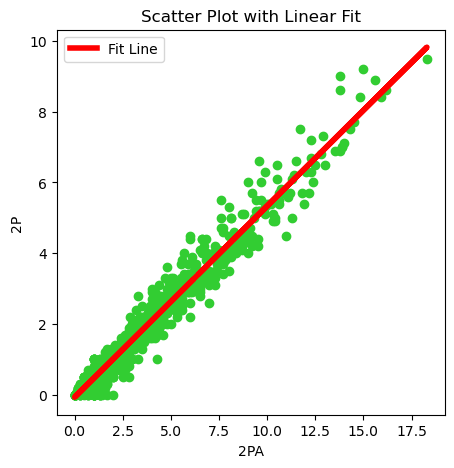

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "2PA"
dependent_variable = "2P"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='limegreen')

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 1)  # degree 1 polynomial = line
fit_line = np.poly1d(coefficients)

# Generate y-values for the fit line
y_fit = fit_line(NBA_regular_2021[independent_variable])

# Plot the linear fit line
plt.plot(NBA_regular_2021[independent_variable], y_fit, label='Fit Line', color='red', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Show the plot
plt.show()

<div style = 'background-color:khaki'> <br> <center>  <b> <u> <font size="5">  CALCULATING THE ERROR </font> </u> </b>    </div>
<div style = 'background-color:khaki'> <br> </div>

## 🟢 Calculating absolute error and mean absolute error (MAE)

Now that we have the linear fit (inside the variable `y_fit`), we can compare it with the actual data. We can find the following kinds of errors:

- Absolute error
 ### $\lvert \rm{ActualData} - \rm{FitData} \rvert$
- Mean absolute error
 ### $\dfrac{\sum_i^N \lvert \rm{ActualData}_i - \rm{FitData}_i \rvert}{N}$

In [4]:
# Make variables for the actual NBA data and the modeled data (the fit)
Actual_data = NBA_regular_2021[dependent_variable]
Modeled_data = y_fit

#The absolute error is the absolute value of the difference between the actual data and our fit to the data
Absolute_error = np.abs(Actual_data - Modeled_data)

# The mean absolute error is the mean of the absolute error
Mean_absolute_error = np.mean(Absolute_error)

print("Mean absolute error: ", Mean_absolute_error)

Mean absolute error:  0.2604497730493854


### 🟢 Calculating mean square error (MSE) and root mean square error (RMS)
The mean square error (MSE) and root mean square (RMS) error give us a slightly better idea of the distance of each point from the prediction. Recall that we are currently only measuring the error in the two-pointers made (as a function of two-pointers attempted). These take the following functional forms

#### MSE


We can calculate the MSE and RMS errors using the `mean_squared_error` function from the `scikit-learn` library

In [5]:
# Use the mean_squared_error function from scikit-learn
MSE = mean_squared_error(Actual_data, Modeled_data)

# The root mean square error is the square root of the MSE
RMS = np.sqrt(MSE)

print("Mean squared error: ", MSE)
print("RMS error: ", RMS)

Mean squared error:  0.13063962852717556
RMS error:  0.3614410443311268


## 2. Error bars

Error bars help us visualize how reliable our fit is at predicting data. Error bars can represent any of the kinds of errors that we calculate, including:
- Absolute Error
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Square Error (RMS)

- **Standard Deviation** - this one is different. it does not require us to compare against a model!

<div style = 'background-color:mediumspringgreen'> <br> <center>  <b> <u> <font size="5">  SHOWING ERROR BARS FOR A FIT </font> </u> </b>    </div>
<div style = 'background-color:mediumspringgreen'> <br> </div>


### 🟢 Calculating polynomial fit from a scatter

To show errorbars in our scatter plots, we must first consider a trend between two variables and fit the trend. Let's consider field goal attempts (FGA) as a function of minutes played (MP). This trend is well fit by a second-degree polynomial (`deg=2` in `numpy`'s `poylfit`)

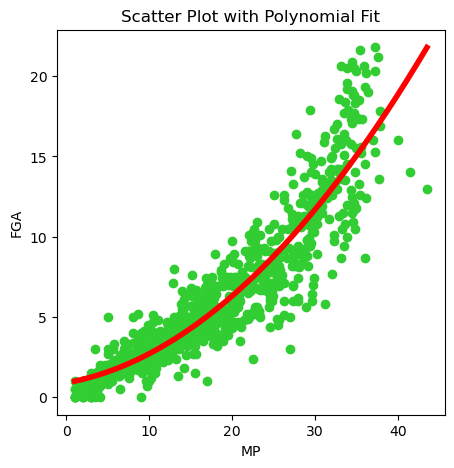

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "FGA"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='limegreen')

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], 
                          NBA_regular_2021[dependent_variable], 
                          deg=2)
fit_line = np.poly1d(coefficients)
x_fit = np.linspace(np.min(NBA_regular_2021[independent_variable]), np.max(NBA_regular_2021[independent_variable]), 500)

# Generate y-values for the fit line
y_fit = fit_line(x_fit)

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='red', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Polynomial Fit')

# Show the plot
plt.show()

Now, we can find all of the relevant errors using our data and fit

### 🟢 Calculating relevant errors

In [7]:
Actual_data = NBA_regular_2021[dependent_variable]
Modeled_data = fit_line(NBA_regular_2021[independent_variable])

#Absolute error
Absolute_error = np.abs(Actual_data - Modeled_data)
#MAE
Mean_absolute_error = np.mean(Absolute_error)
#MSE
MSE = mean_squared_error(Actual_data, Modeled_data)
#RMS
RMS = np.sqrt(MSE)
#Standard deviation
StandardDeviation = Actual_data.std()

Let's use errorbars to represent the absolute error in our plot, to see what it looks like

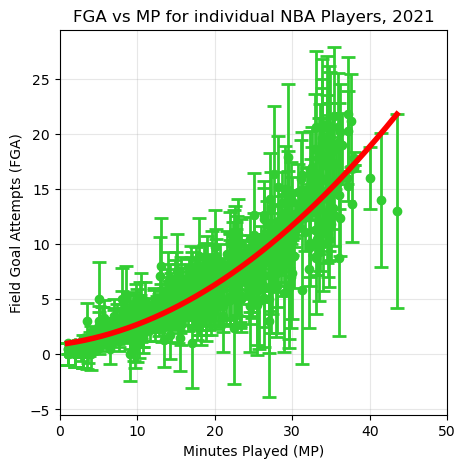

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

Players_to_consider = ['Stephen Curry', 'Cody Zeller', 'LeBron James', 'Jalen Brunson', 'Ivica Zubac']

plt.errorbar(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 
             yerr=Absolute_error, 
             fmt='o', capsize=5, elinewidth=2, capthick=2, color='limegreen')

plt.plot(x_fit, y_fit, color='red', linewidth=4, zorder=3)


axs.set_xlim([0,50])
axs.set_xlabel("Minutes Played (MP)")
axs.set_ylabel("Field Goal Attempts (FGA)")
axs.set_title("FGA vs MP for individual NBA Players, 2021")
plt.grid(True, alpha=0.3)

This plot is very noisy! Usually it is useful to show just a few data points that are interesting, along with the fit for the entire dataset. Let's visualize this same relationship for a few players in the NBA.

### 🟢 Showing error bars for a few representative data points

4.406704766906234
0.33642291957766
5.131287661757206
0.11395228493159593
1.9568835453392683


C:\Users\rd7347\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\rd7347\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


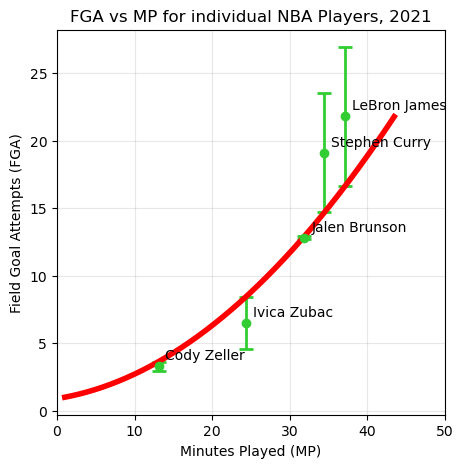

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

#Make a list in which to store the players that we want to consider
Players_to_consider = ['Stephen Curry', 'Cody Zeller', 'LeBron James', 'Jalen Brunson', 'Ivica Zubac']

#
for player in Players_to_consider:
    FGA = NBA_regular_2021.loc[NBA_regular_2021['Player'] == player]['FGA']
    MP = NBA_regular_2021.loc[NBA_regular_2021['Player'] == player]['MP']
    i = NBA_regular_2021.loc[NBA_regular_2021['Player'] == player].index.values.astype(int)[0]
    relerr = np.asarray(Absolute_error)[i]
    print(relerr)
    plt.errorbar(MP, FGA, yerr=relerr, fmt='o', capsize=5, elinewidth=2, capthick=2, color='limegreen')
    plt.annotate(player, xy=(MP, FGA), xytext=(5,5), textcoords='offset points')
plt.plot(x_fit, y_fit, color='red', linewidth=4)
axs.set_xlim([0,50])
axs.set_xlabel("Minutes Played (MP)")
axs.set_ylabel("Field Goal Attempts (FGA)")
axs.set_title("FGA vs MP for individual NBA Players, 2021")
plt.grid(True, alpha=0.3)

<div style = 'background-color:skyblue'> <br> <center>  <b> <u> <font size="5"> SHOWING ERROR BARS FOR A BAR GRAPH </font> </u> </b>    </div>
<div style = 'background-color:skyblue'> <br> </div>

### Bar graphs

In order to show error bars in a bar graph, let's think of different categories that exist in our dataset. The most obvious one is teams, so let's try to visualize some data for 3 teams, and understand the error in that data using error bars.

First, let's see which teams are available. You can find all of the unique entries in a list using the pyhon `set` function

In [9]:
print(set(NBA_regular_2021['Tm']))

{'MIA', 'BOS', 'ATL', 'GSW', 'DAL', 'POR', 'OKC', 'HOU', 'PHI', 'DEN', 'PHO', 'NOP', 'DET', 'LAL', 'SAC', 'LAC', 'CLE', 'CHI', 'MEM', 'CHO', 'ORL', 'MIL', 'WAS', 'TOR', 'TOT', 'MIN', 'NYK', 'IND', 'UTA', 'BRK', 'SAS'}


### 🟢 Calculating the standard deviation for a given stat across a few different teams

In [10]:
#make a list of the 3 teams you want to consider
Teams_to_consider = ["NYK", "BRK", "PHI"] #Knicks, Nets, and 76ers

First_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == Teams_to_consider[0]]
Second_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == Teams_to_consider[1]]
Third_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == Teams_to_consider[2]]

#Let's collect all of these dataframes in an array of dataframes so they are easy to call back later
Data_by_team_2021 = [First_team_data_2021, Second_team_data_2021, Third_team_data_2021]

#Next, choose a stat to consider
Stat_to_consider = "FG%" #field goal percentage

Now that we've selected the teams and stat we want to consider, let's find some useful statistical quantities for this stat. Let's find:
- The average FG%
- The standard deviation in FG%

In [11]:
#Let's make empty arrays in which to store the averages and standard deviations
Averages_2021 = []
StDevs_2021 = []

print("Stats for %s" %Stat_to_consider)
for i in range(0, len(Teams_to_consider)):
    Current_Dataframe = Data_by_team_2021[i]
    Current_Average = np.mean(Current_Dataframe[Stat_to_consider])
    Current_StandardDeviation = Current_Dataframe[Stat_to_consider].std()
    
    #store these quantities in the empty arrays
    Averages_2021.append(Current_Average)
    StDevs_2021.append(Current_StandardDeviation)
    
    #print some information
    print("Team: %s --- Average: %1.3f --- Standard Deviation: %1.3f" %(Teams_to_consider[i], Current_Average, Current_StandardDeviation))
    


Stats for FG%
Team: NYK --- Average: 0.377 --- Standard Deviation: 0.210
Team: BRK --- Average: 0.435 --- Standard Deviation: 0.133
Team: PHI --- Average: 0.447 --- Standard Deviation: 0.183


Text(0.5, 1.0, 'Average FG% for 3 teams during the regular 2021 season')

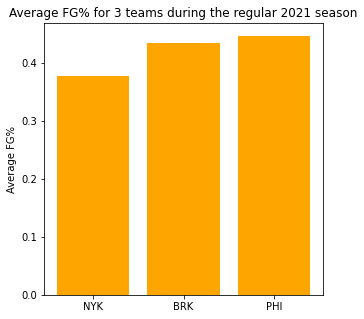

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

#Use the plt.bar function to create a bar graph
plt.bar(Teams_to_consider, Averages_2021, color='orange')

#plt.xlabel(independent_variable)
plt.ylabel("Average FG%")
plt.title("Average FG% for 3 teams during the regular 2021 season")

Let's add errorbars to this graph. We will use the standard deviation to give us a sense of the error in the data

### 🟢 Showing the standard deviation as an error bar in a bar graph

Text(0.5, 1.0, 'Average FG% for 3 teams during the regular 2021 season')

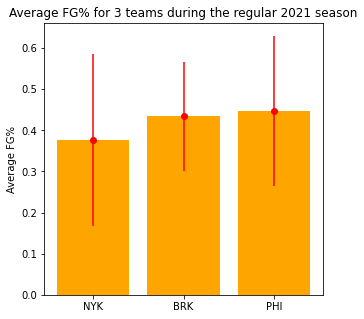

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

#Use both the plt.bar and plt.errorbar functions to create a bargraph with errorbars
plt.bar(Teams_to_consider, Averages_2021, color='orange')
plt.errorbar(Teams_to_consider, Averages_2021, yerr=StDevs_2021, color='red', fmt="o")

#plt.xlabel(independent_variable)
plt.ylabel("Average FG%")
plt.title("Average FG% for 3 teams during the regular 2021 season")

<div style = 'background-color:plum'> <br> <center>  <b> <u> <font size="5">  TIMESERIES ANALYSIS </font> </u> </b>    </div>
<div style = 'background-color:plum'> <br> </div>

## 3. Timeseries

Timeseries analysis deals with understanding the way data changes over time. This involves things like:
- prediction of the way the data will look in the future (with error estimates)
- explanation of how the data might have looked in the past
- Understanding how frequently things change in a certain direction

We have NBA regular and post-season data for 3 seasons. Let's pull in all of the data we have for these seasons.

In [14]:
NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';')
NBA_playoff_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Playoffs.csv', engine='python', delimiter=';')

NBA_regular_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Regular.csv', engine='python', delimiter=';')
NBA_playoff_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Playoffs.csv', engine='python', delimiter=';')

NBA_regular_2023 = pd.read_csv('../Data/NBA_2023-2024_stats_Regular.csv', engine='python', delimiter=';')
NBA_playoff_2023 = pd.read_csv('../Data/NBA_2023-2024_stats_Playoffs.csv', engine='python', delimiter=';')

As an example of some of the things we can do with timeseries analysis, let's focus on individual players and track their stats across 3 seasons. I picked players at random, but you can pick any other player!

### 🟢 Create a separate dataframe for individual players that holds all of their stats

In [15]:
#make a string with the player name you're interested in
#Player = "Karl-Anthony Towns"
Players_to_consider = ["LeBron James", "Karl-Anthony Towns"]
#Colors_to_use = ""

#We will collect all of the player data for all 3 years into this array
Player_data_all_years=[]

#We will loop over each player
for Player in Players_to_consider:
    #check if the player played in all 3 seasons
    if(Player in np.asarray(NBA_regular_2021['Player']) and Player in np.array(NBA_regular_2022['Player']) and Player in np.array(NBA_regular_2023['Player'])):
        print("%s played in all 3 regular seasons (2021-2023)" %Player)
    else: 
        print("Player did not play in all seasons")

    #Get the player's data for each year
    Player_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Player'] == Player]
    Player_data_2022 = NBA_regular_2022.loc[NBA_regular_2022['Player'] == Player]
    Player_data_2023 = NBA_regular_2023.loc[NBA_regular_2023['Player'] == Player]

    #let's add the year to each of these datasets - with pandas dataframes, you can add a new column using the
    #.assign() function
    Player_data_2021=Player_data_2021.assign(Year=[2021])
    Player_data_2022=Player_data_2022.assign(Year=[2022])
    Player_data_2023=Player_data_2023.assign(Year=[2023])

    #Let's combine all three datasets into one and display it
    Player_data_all_years.append(pd.concat([Player_data_2021, Player_data_2022, Player_data_2023]))
    display(Player_data_all_years[-1])


LeBron James played in all 3 regular seasons (2021-2023)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
368,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,2021
306,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,2022
325,250,LeBron James,PF,39,LAL,71,71,35.3,9.6,17.9,...,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7,2023


Karl-Anthony Towns played in all 3 regular seasons (2021-2023)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
736,546,Karl-Anthony Towns,C,26,MIN,74,74,33.5,8.7,16.4,...,2.6,7.2,9.8,3.6,1.0,1.1,3.1,3.6,24.6,2021
609,478,Karl-Anthony Towns,PF,27,MIN,29,29,33.0,7.3,14.8,...,1.7,6.5,8.1,4.8,0.7,0.6,3.0,3.8,20.8,2022
651,506,Karl-Anthony Towns,PF,28,MIN,62,62,32.7,7.7,15.3,...,1.5,6.8,8.3,3.0,0.7,0.7,2.9,3.3,21.8,2023


Let's plot this player's stats (there are 25 of them) across the 3 regular seasons

### 🟢 Show all of the data for each player

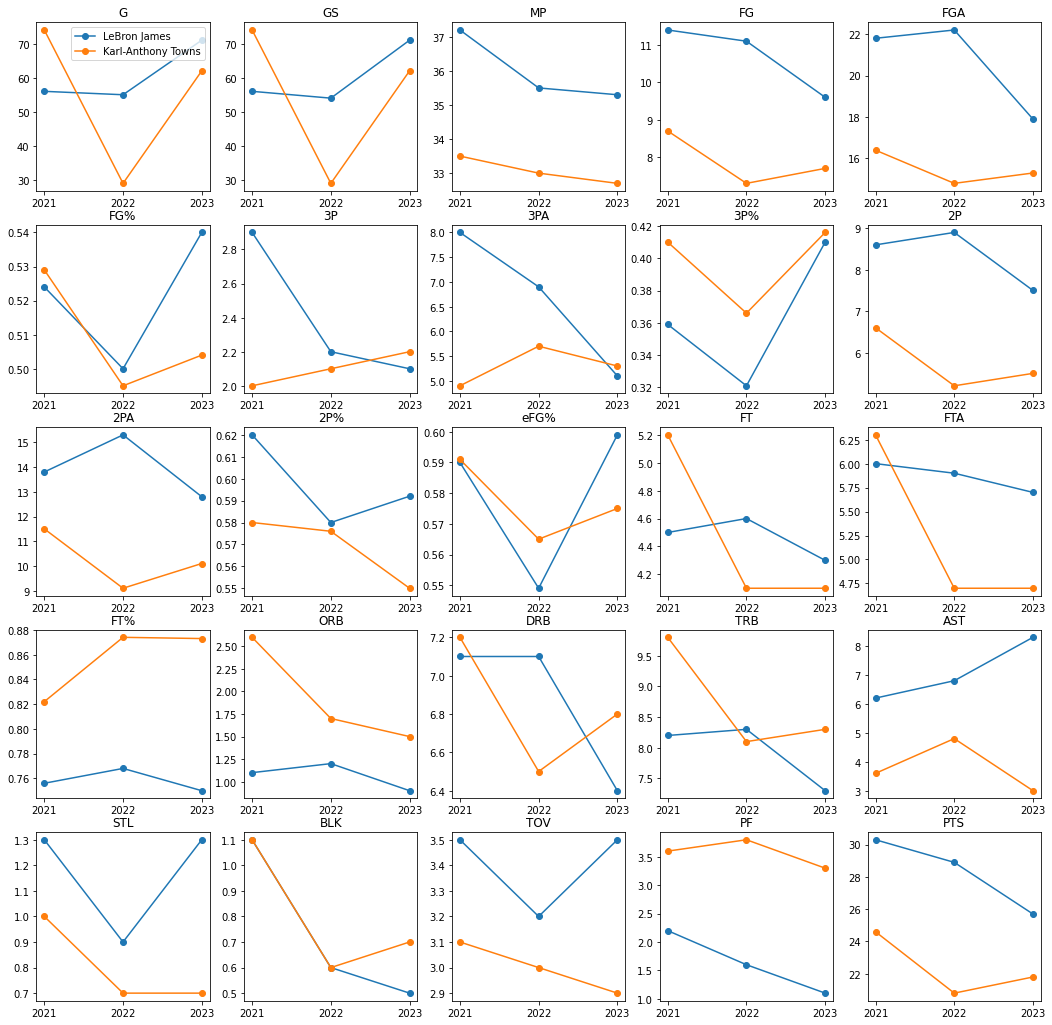

In [18]:
fig, axs = plt.subplots(5, 5, figsize=(18, 18))

#We show what the data looks like for each player across the three seasons by looping over all of the 
#possible stats
for p in range(0, len(Players_to_consider)):
    #The free index helps us count the variables we want to consider, 
    #starting with the 5th variable (Games played, "G")
    free_index=5
    for i in range(0, 5):
        for j in range(0, 5):
            #Get the name of each possible dependent variable from the .columns function 
            #(starting with the 5th stat (this is what free_index does))
            dependent_variable = "%s"%Player_data_all_years[p].columns[free_index]
            
            #Plot this dependent variable vs the year played
            axs[i][j].plot(Player_data_all_years[p]['Year'], Player_data_all_years[p][dependent_variable], marker='o', label=Players_to_consider[p])
            axs[i][j].set_title(dependent_variable)
            
            #Set the xticks for the dependent variable
            axs[i][j].set_xticks([2021, 2022, 2023])
            
            #increase the free index to move to the next variable
            free_index+=1

#Make a legend on the first plot
axs[0][0].legend(loc='best')


Which of these looks like it may be trending? Let's consider LeBron's free throw attempts (FTA) and points scored (PTS) and fit these with a linear trend

### 🟢 Fit a linear trend for two of the stats above (for LeBron)

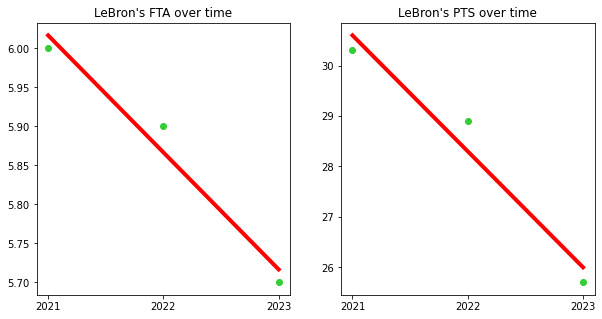

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot positive correlation - 
independent_variable = "Year"

#Using our arrays created above, LeBron's data is index 0 and Karl-Anthony's data is index 1
LeBron_index = 0

dependent_variables_to_consider=['FTA', 'PTS']

#Make empty arrays in which to store our results
Linear_fits = []

#This helps us count the plots for each variable
counter=0
for dependent_variable in dependent_variables_to_consider:
    #On each plot, show the scatter trend of each stat vs the year played
    #By focusing on the zeroth index of the dataframe (Player_data_all_years[0]), we focus on LeBron's data
    axs[counter].scatter(Player_data_all_years[0]['Year'], 
                         Player_data_all_years[0][dependent_variable], color='limegreen')

    #Make a title
    axs[counter].set_title("LeBron's %s over time" %dependent_variable)
    axs[counter].set_xticks([2021,2022,2023])

    # Calculate the linear fit (least squares)
    coefficients = np.polyfit(Player_data_all_years[LeBron_index][independent_variable], 
                              Player_data_all_years[LeBron_index][dependent_variable], 
                              deg=1)  # degree 1 polynomial = line
    Coefficients_FGA_and_PTS.append(coefficients)
    
    fit_line = np.poly1d(coefficients)
    x_fit = Player_data_all_years[0]['Year']
    # Generate y-values for the fit line
    y_fit = fit_line(x_fit)
    
    #Save the linear fit into an array
    Linear_fits.append(fit_line)

    # Plot the linear fit line
    axs[counter].plot(x_fit, y_fit, color='red', linewidth=4)

    #increase the counter to change the stat we are considering
    counter +=1
# Add labels and title


# Show the plot
plt.show()

Because we have the equation for each line, we can predict what LeBron's FTA and PTS would be in the 2024-2025 season using our linear model. Let's calculate what it would be for 2024. 

Remember that when making predictions, it is crucial to have some understanding in the error of your model. One quick estimate we could use is the standard deviation, so let's calculate that for each stat too.

### 🟢 Use the linear fits from above to predict LeBron's FGA and PTS for the next year and calcukate the standard deviation for each stat

In [27]:
#Calculate the standard deviation for LeBron, for each stat
StdDev_FTA = Player_data_all_years[LeBron_index]['FTA'].std()
StdDev_PTS = Player_data_all_years[LeBron_index]['PTS'].std()

#Set the year you want to predict with this data
Prediction_year = 2024

#Access our stored results to make variables of each fit
FTA_from_Year = Linear_fits[0]
PTS_from_Year = Linear_fits[1]

#Use the fits to predict FGA and PTS for the next year
FTA_prediction_2024 = FTA_from_Year(Prediction_year)
PTS_prediction_2024 = PTS_from_Year(Prediction_year)

print("%d FGA Prediction: %1.3f   --- StdDev: %1.3f" %(Prediction_year, FTA_prediction_2024, StdDev_FTA))
print("%d PTS Prediction: %1.3f   --- StdDev: %1.3f" %(Prediction_year, PTS_prediction_2024, StdDev_PTS))

print("1 Sigma interval for FGA: ", FTA_prediction_2024 - StdDev_FTA, "to", FTA_prediction_2024 + StdDev_FTA)
print("1 Sigma interval for PTS: ", PTS_prediction_2024 - StdDev_PTS, "to", PTS_prediction_2024 + StdDev_PTS)

2024 FGA Prediction: 5.567   --- StdDev: 0.153
2024 PTS Prediction: 23.700   --- StdDev: 2.358
1 Sigma interval for FGA:  5.413914143501412 to 5.7194191898318
1 Sigma interval for PTS:  21.34203477548768 to 26.05796522450832


Using these statistics and analysis we can now say something like:

#### If LeBron James' 3-year trend continues, our model predicts that he will likely make around 6  free-throw attempts per game in 2024. Our model predicts that he will make somewhere between 5.41 and 5.72 free-throw attempts per game in 2024 (1$\sigma$).

and

#### If LeBron James' 3-year trend continues, our model predicts that he will likely make around 24 points per game in 2024. We can say that he will make somewhere between 21.34 and 26.01 points per game in 2024 with 68% confidence (1$\sigma$).

In 2024 LeBron actually made 4.7 FTA and 24.4 PTS, so our model was actually pretty accurate! This is how we can use statistics to make predictions about things, but we must always try to understand the limitations of our models and the caveats (error). 

Of course, because we only considered a 3-year trend, the model is not as strong as it could be. The more data we incorporate, the more accurate and complex our model could be (so we can maybe consider something other than a linear trend).

(see https://www.espn.com/nba/stats/player/_/stat/free-throws/season/2025/seasontype/2 for NBA stats for 2024)

<div style = 'background-color:lawngreen'> <br> <center>  <b> <u> <font size="5">  EXERCISES </font> </u> </b>    </div>
<div style = 'background-color:lawngreen'> <br> </div>
    
 <span style="background-color: lawngreen;"> <b> <u> FOR ALL OF THE EXERCISES BELOW, USE DATA FROM A SEASON OTHER THAN THE 2021 REGULAR SEASON </u> </b> </span>


### 🔍 EXERCISE 0: Import data for an NBA season other than the 2021 regular season (*you can use regular or playoff seasons*)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')
NBA_regular_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')
NBA_regular_2023 = pd.read_csv('../Data/NBA_2023-2024_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')


NBA_regular_2021 


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [13]:
NBA_regular_2022

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [14]:
NBA_regular_2023

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


### 🔍 EXERCISE 1: Calculate a linear fit for 3P vs 3PA. Use this linear fir to find the min and max relative error between the actual 3P data and the fit. Calculate the average of the average of the relative error for this fit. Why is not a great measure of the error?

Hints and steps: 
- Use code from the <span style="background-color: salmon;"> <b> <u> CALCULATING A LINEAR FIT FROM A SCATTER </u> </b> </span> section to get the linear fit

- Calculate the Relative Error by taking the difference between the actual data and the fit

- Calculate the average of the Relative Error using np.mean. Is this number bigger or smaller than you expected? Why do you think that is?

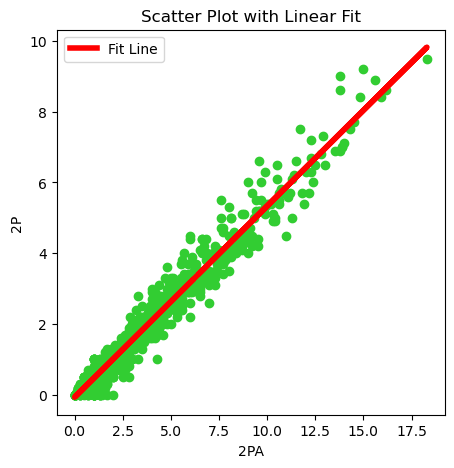

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "2PA"
dependent_variable = "2P"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='limegreen')

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 1)  # degree 1 polynomial = line
fit_line = np.poly1d(coefficients)

# Generate y-values for the fit line
y_fit = fit_line(NBA_regular_2021[independent_variable])

# Plot the linear fit line
plt.plot(NBA_regular_2021[independent_variable], y_fit, label='Fit Line', color='red', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Show the plot
plt.show()

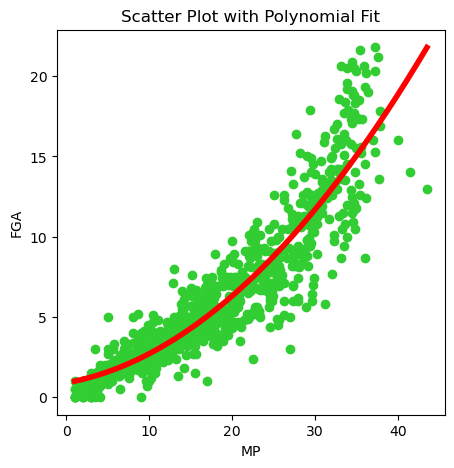

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "FGA"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='limegreen')

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], 
                          NBA_regular_2021[dependent_variable], 
                          deg=2)
fit_line = np.poly1d(coefficients)
x_fit = np.linspace(np.min(NBA_regular_2021[independent_variable]), np.max(NBA_regular_2021[independent_variable]), 500)

# Generate y-values for the fit line
y_fit = fit_line(x_fit)

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='red', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Polynomial Fit')

# Show the plot
plt.show()



Actual_data = NBA_regular_2021[dependent_variable]
Modeled_data = fit_line(NBA_regular_2021[independent_variable])

#Absolute error
Absolute_error = np.abs(Actual_data - Modeled_data)
#MAE
Mean_absolute_error = np.mean(Absolute_error)
#MSE
MSE = mean_squared_error(Actual_data, Modeled_data)
#RMS
RMS = np.sqrt(MSE)
#Standard deviation
StandardDeviation = Actual_data.std()

### 🔍 EXERCISE 2: Calculate good measures of error for this fit (3P vs 3PA), including

- The absolute error?
- The mean absolute error (MAE)?
- The RMS error

Hints and steps: 
- Use code from the <span style="background-color: khaki;"> <b> <u> CALCULATE THE ERROR </u> </b> </span> section to calculate these good measures of error.

- Which of these is the smallest, and which is the biggest?

- Which do you think is the most reliable measure of error?

In [17]:
# Make variables for the actual NBA data and the modeled data (the fit)

# Example of fitting a linear model: 3P vs 3PA
import numpy as np
import pandas as pd

# Assuming NBA_regular_2021 is already loaded

# Step 1: Extract input (x = 3PA) and output (y = 3P)
x = NBA_regular_2021["3PA"].values
y = NBA_regular_2021["3P"].values

# Step 2: Fit linear model
coefficients = np.polyfit(x, y, deg=1)
model = np.poly1d(coefficients)

# Step 3: Predict values
y_fit = model(x)

# Step 4: Calculate error metrics (AFTER defining y_fit)
Absolute_error = np.abs(y - y_fit)
Mean_absolute_error = np.mean(Absolute_error)
RMS_error = np.sqrt(np.mean((y - y_fit) ** 2))

# Step 5: Print output
print("Mean absolute error (MAE):", Mean_absolute_error)
print("RMS error:", RMS_error)


Mean absolute error (MAE): 0.13664630180268708
RMS error: 0.20513258873364174


### 🔍 EXERCISE 3: Find a fit for the relationship between the number of assists (AST) and minutes played (MP). Plot the fit. Calculate the RMS error in this fit and display it as an error bar for 3 different players on the New York Knicks.

Hints and steps: 
- Use code from the <span style="background-color: mediumspringgreen;"> <b> <u> SHOWING ERROR BARS FOR A FIT </u> </b> </span> section to get a polynomial fit for this relationship. Plot just the fit and the scatter in different colors.

- Use code from the <span style="background-color: khaki;"> <b> <u> CALCULATE THE ERROR </u> </b> </span> section to calculate the RMS error for this fit. 

- Find 3 players on the New York Knicks (NYK) by (hint: you can show all of the players on the NYK by printing the results of `NBA_regular_2021.loc[NBA_regular_2021['Tm'] == "NYK"]['Player']`

- Use code from the <span style="background-color: mediumspringgreen;"> <b> <u> SHOWING ERROR BARS FOR A FIT </u> </b> </span> to show the RMS error as the errorbars for each of these players. Use a different color than you did for the fit and scatter to show these.

Mean squared error:  3.440464244658602
RMS error:  1.8548488468494142


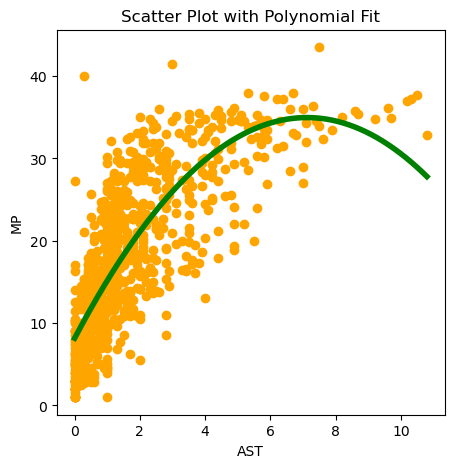

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "AST"
dependent_variable = "MP"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='orange')

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], 
                          NBA_regular_2021[dependent_variable], 
                          deg=2)
fit_line = np.poly1d(coefficients)
x_fit = np.linspace(np.min(NBA_regular_2021[independent_variable]), np.max(NBA_regular_2021[independent_variable]), 500)

# Generate y-values for the fit line
y_fit = fit_line(x_fit)

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='green', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Polynomial Fit')
# The root mean square error is the square root of the MSE
RMS = np.sqrt(MSE)

print("Mean squared error: ", MSE)
print("RMS error: ", RMS)
# Show the plot
plt.show()

In [25]:
print(NBA_regular_2021.loc[NBA_regular_2021['Tm'] == "NYK"]['Player'])


20      Ryan Arcidiacono
40            RJ Barrett
104           Alec Burks
181       Damyean Dotson
229        Evan Fournier
252           Taj Gibson
273       Quentin Grimes
279           Tyler Hall
337     Danuel House Jr.
346           Feron Hunt
422           Kevin Knox
486        Miles McBride
525          Matt Mooney
554         Nerlens Noel
615    Immanuel Quickley
617        Julius Randle
621          Cam Reddish
635    Mitchell Robinson
641         Derrick Rose
662         Wayne Selden
674         Jericho Sims
734           Obi Toppin
756         Kemba Walker
Name: Player, dtype: object


In [32]:
RMS = np.sqrt(MSE)
#Standard deviation
StandardDeviation = Actual_data.std()

RMS error: 1.25911456947225
20      Ryan Arcidiacono
40            RJ Barrett
104           Alec Burks
181       Damyean Dotson
229        Evan Fournier
252           Taj Gibson
273       Quentin Grimes
279           Tyler Hall
337     Danuel House Jr.
346           Feron Hunt
422           Kevin Knox
486        Miles McBride
525          Matt Mooney
554         Nerlens Noel
615    Immanuel Quickley
617        Julius Randle
621          Cam Reddish
635    Mitchell Robinson
641         Derrick Rose
662         Wayne Selden
674         Jericho Sims
734           Obi Toppin
756         Kemba Walker
Name: Player, dtype: object


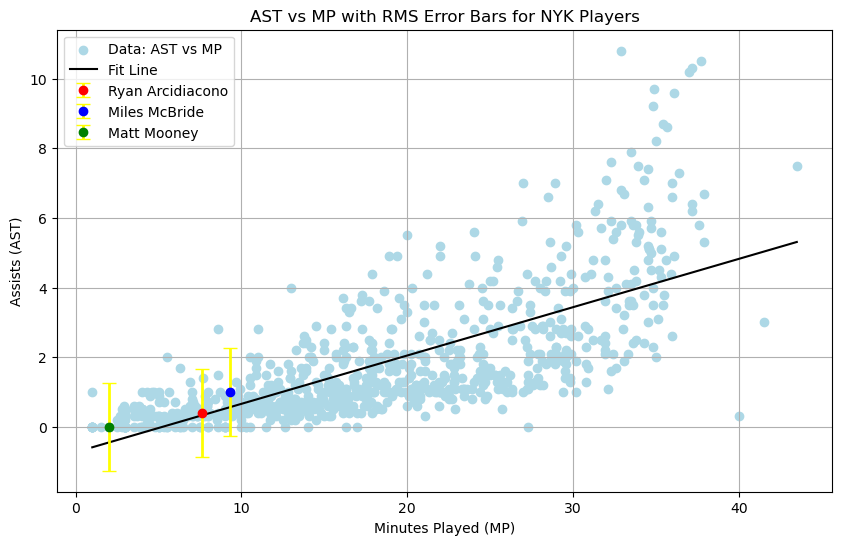

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fit AST vs MP
x = NBA_regular_2021["MP"].values  # Minutes Played
y = NBA_regular_2021["AST"].values  # Assists

# Fit a degree 1 polynomial (linear fit)
coefficients = np.polyfit(x, y, deg=1)
model = np.poly1d(coefficients)
y_fit = model(x)

# Step 2: Calculate RMS Error
RMS_error = np.sqrt(np.mean((y - y_fit) ** 2))
print("RMS error:", RMS_error)

# Step 3: Plot fit and scatter
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="lightblue", label="Data: AST vs MP")
x_line = np.linspace(min(x), max(x), 100)
y_line = model(x_line)
plt.plot(x_line, y_line, color="black", label="Fit Line")

# Step 4: Choose 3 NYK players
print(NBA_regular_2021.loc[NBA_regular_2021['Tm'] == "NYK"]['Player'])

# Choose 3 players 
Players_to_consider = ["Ryan Arcidiacono", "Miles McBride", "Matt Mooney"]
Colors_to_use = ["red", "blue", "green"]

# Step 5: Plot those 3 NYK players with RMS error bars
for i, player in enumerate(Players_to_consider):
    player_row = NBA_regular_2021.loc[NBA_regular_2021["Player"] == player]
    
    if not player_row.empty:
        mp = player_row["MP"].values[0]
        ast = player_row["AST"].values[0]
        
        plt.errorbar(mp, ast, yerr=RMS_error,
                     fmt='o', color=Colors_to_use[i],
                     label=player,
                     ecolor='yellow', capsize=5, elinewidth=2)

# Step 6: Final plot formatting
plt.xlabel("Minutes Played (MP)")
plt.ylabel("Assists (AST)")
plt.title("AST vs MP with RMS Error Bars for NYK Players")
plt.legend()
plt.grid(True)
plt.show()


### 🔍 EXERCISE 4: Find the Standard Deviation in the FG%. Plot the average FG% for 4 different teams, with errorbars showing 1 Standard Deviation. 

Hints and steps:

- Use code from the <span style="background-color: skyblue;"> <b> <u> SHOWING ERROR BARS FOR A BAR GRAPH </u> </b> </span> section to calculate the standard deviation for each team you want to consider

- Use code from this same section to show the average FG% with errorbars depicting the standard deviation

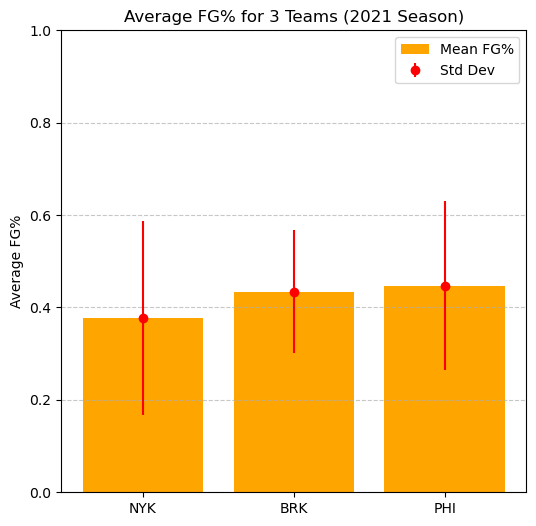

In [20]:
#make a list of the 3 teams you want to consider
Teams_to_consider = ["NYK", "BRK", "PHI"] #Knicks, Nets, and 76ers

First_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == Teams_to_consider[0]]
Second_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == Teams_to_consider[1]]
Third_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == Teams_to_consider[2]]

#Let's collect all of these dataframes in an array of dataframes so they are easy to call back later
Data_by_team_2021 = [First_team_data_2021, Second_team_data_2021, Third_team_data_2021]

#Next, choose a stat to consider
Stat_to_consider = "FG%" #field goal percentage

Averages_2021 = [team[Stat_to_consider].mean() for team in Data_by_team_2021]
StDevs_2021 = [team[Stat_to_consider].std() for team in Data_by_team_2021]

team_colors = ['blue', 'green', 'red']  # NYK, BRK, PHI

# Step 6: Plot
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.bar(Teams_to_consider, Averages_2021, color= 'orange', label="Mean FG%")
plt.errorbar(Teams_to_consider, Averages_2021, yerr=StDevs_2021, color='red', fmt='o', label="Std Dev")

plt.ylabel("Average FG%")
plt.title("Average FG% for 3 Teams (2021 Season)")
plt.ylim(0, 1)  # FG% is between 0 and 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### 🔍 CHALLENGE EXERCISES: What other timeseries analyses can you think of doing with this data? Try to tackle one of the problems below:

#### Team Momentum Analysis
Consider the performance of a few different teams across the different seasons. For each team, calculate the averages, standard deviations, and different errors for different stats across players. How do these averages change across the seasons? Can you notice any trends for the team that won the NBA Championship? What about for the team in last place, and an average NBA team that did not make the playoffs?

#### Playoff Performance Prediction
Use regular season data to build models predicting player success, similar to the example in the <span style="background-color: plum;"> <b> <u> TIMESERIES ANALYSIS </u> </b> </span> section above. Do the same thing using the playoff data and compare the results. Are the error and standard deviation similar for regular season and playoffs?

#### Change Point Detection:
Find when a player may have had significant performance shifts (either negative or positive) across the 3 
seasons. Do some background research for why that player may have experienced that shift in performance (aging, injuries, trade)?

#### Career Trajectory Modeling
Fit trend lines to several player's 3-season progression. Classify players into categories: improving, declining, plateauing, volatile. How certain can you be that each player you consider fits into these categories?